<a href="https://colab.research.google.com/github/KUNAL-MAURYA1470/ML/blob/main/200090107084_200090107043_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<td><img src="https://navyugtrust.org/img/icons/trust_logo.png" width=100 height=100>
<td><img src="https://ckpcet.ac.in/img/logo.svg"
alt="CKPCET" width=100 height=100><br>
C.K.Pithawala College of Engineering and Technology, Surat<br>
Div. : A<br>
Subject : Machine Learning<br>
Subject Code : 3170724<br>
1.Name:KUNAL MAURYA  Enrollment: 200090107084 <br>
2.Name:KALASH THAKKAR Enrollment: 200090107043 <br>
Data Set : Heart Failure Prediction Dataset <br>
Data Set Link :https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data<br>
Academic Year : 2022-2023<br>
Subject Faculty : Dr. Ami Tusharkant Choksi<br>

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data</center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [ ]:
categorical_feature = df.dtypes==object
final_categorical_feature = df.columns[categorical_feature].tolist()
# ---------------------------------------------------------
final_numeric_feature = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

<h3><u><B>CO-1. ASSIGNMENT


<b>1.</b>Implement the techniques to deal with outliers.

In [ ]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# ---------------------------------------------------------
def outlier_detect_normal(df, col):
    m = df[col].mean()
    s = df[col].std()
    return df[((df[col]-m)/s).abs()>3]

# ---------------------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# ---------------------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# ---------------------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
    print('outlier replace with upper bound - {}' .format(col))

# ---------------------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('outlier replace with lower bound - {}' .format(col))

# ---------------------------------------------------------
def preprocess(df, col):
    print("*********************** {} ***********************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    df[col].plot(kind='density', subplots=True, sharex=False)
    plt.show()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],(outlier_detect(df[final_numeric_feature],final_numeric_feature[i]).shape[0])))
    print("Z_Score => {}: {}".format(final_numeric_feature[i],(outlier_detect_normal(df[final_numeric_feature],final_numeric_feature[i]).shape[0])))
    print("********************************")

IQR => Age: 0
Z_Score => Age: 0
********************************
IQR => RestingBP: 28
Z_Score => RestingBP: 8
********************************
IQR => Cholesterol: 183
Z_Score => Cholesterol: 3
********************************
IQR => MaxHR: 2
Z_Score => MaxHR: 1
********************************
IQR => Oldpeak: 16
Z_Score => Oldpeak: 7
********************************


*********************** Age ***********************

lower outlier: 0 ****** upper outlier: 0



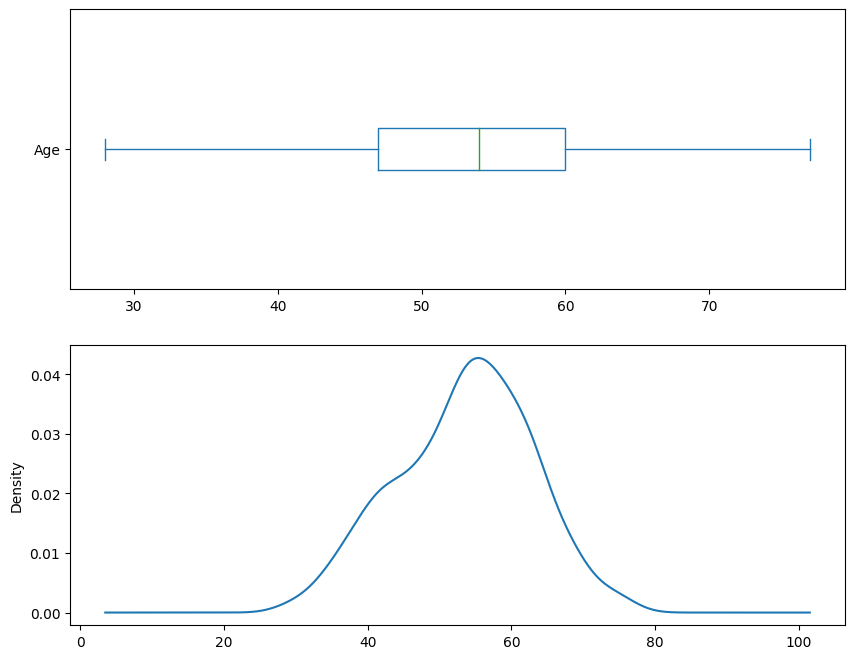

*********************** RestingBP ***********************

lower outlier: 2 ****** upper outlier: 26



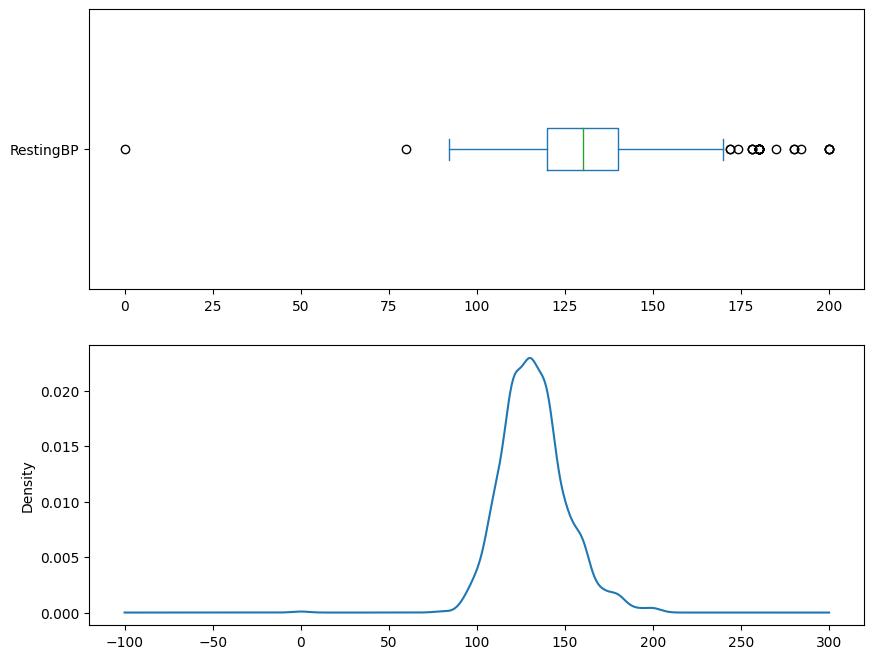

*********************** Cholesterol ***********************

lower outlier: 172 ****** upper outlier: 11



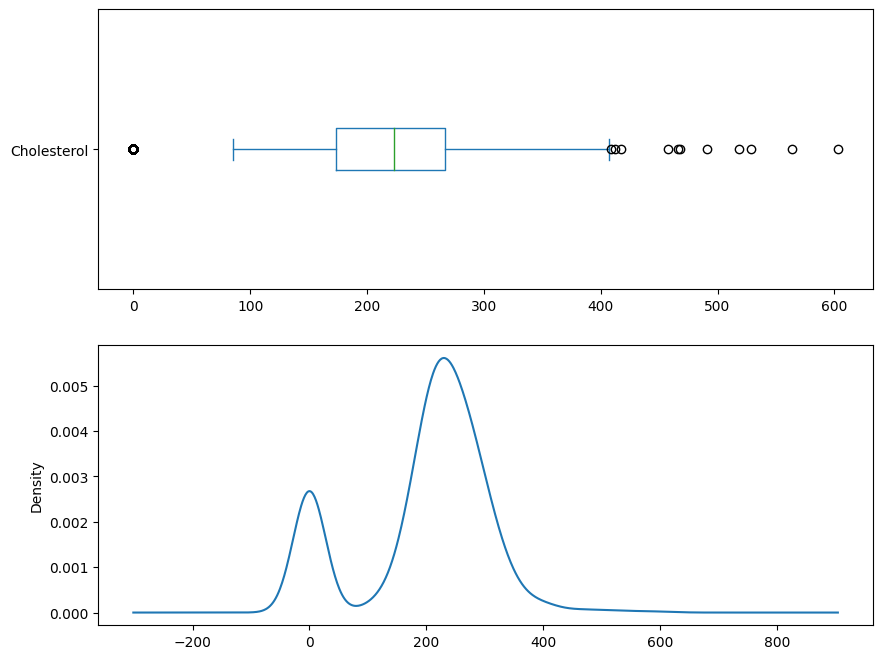

*********************** MaxHR ***********************

lower outlier: 2 ****** upper outlier: 0



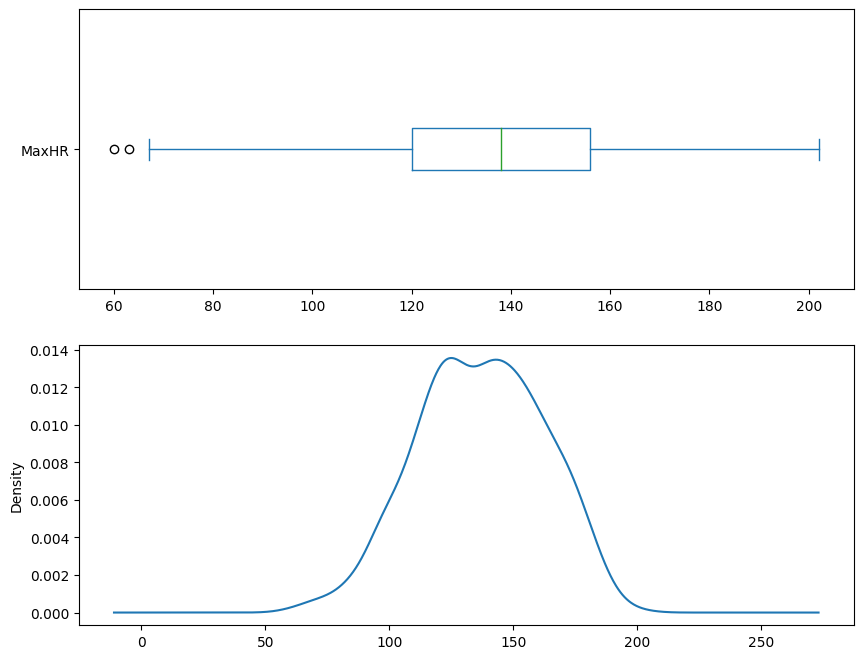

*********************** Oldpeak ***********************

lower outlier: 1 ****** upper outlier: 15



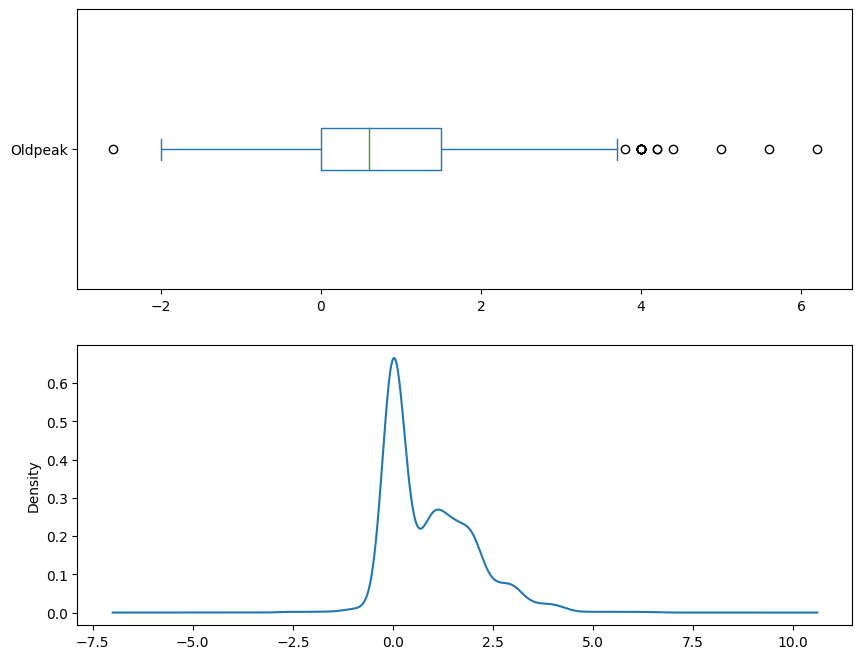

In [ ]:
for i in range(len(final_numeric_feature)):
    preprocess(df[final_numeric_feature], final_numeric_feature[i])

In [ ]:
outlier = []
for i in range(len(final_numeric_feature)):
    if outlier_detect(df[final_numeric_feature],final_numeric_feature[i]).shape[0] !=0:
        outlier.append(final_numeric_feature[i])

outlier

['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
for i in range(len(outlier)):
    replace_upper(df, outlier[i])

print("\n********************************\n")
for i in range(len(outlier)):
    replace_lower(df, outlier[i])

outlier replace with upper bound - RestingBP
outlier replace with upper bound - Cholesterol
outlier replace with upper bound - MaxHR
outlier replace with upper bound - Oldpeak

********************************

outlier replace with lower bound - RestingBP
outlier replace with lower bound - Cholesterol
outlier replace with lower bound - MaxHR
outlier replace with lower bound - Oldpeak


In [ ]:
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],(outlier_detect(df,final_numeric_feature[i]).shape[0])))
    print("Z_Score => {}: {}".format(final_numeric_feature[i],(outlier_detect_normal(df,final_numeric_feature[i]).shape[0])))
    print("********************************")

IQR => Age: 0
Z_Score => Age: 0
********************************
IQR => RestingBP: 0
Z_Score => RestingBP: 0
********************************
IQR => Cholesterol: 0
Z_Score => Cholesterol: 0
********************************
IQR => MaxHR: 0
Z_Score => MaxHR: 0
********************************
IQR => Oldpeak: 0
Z_Score => Oldpeak: 1
********************************


<b>2.</b>Implement the techniques to deal with missing values.


In [ ]:
# Check for missing values in the dataset

missing_values = df.isna().sum()

print(f"It seems like there are no missing values \n{missing_values}")

It seems like there are no missing values 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


<h3><u><B>CO-2. ASSIGNMENT

<b>3.</b>Implement distance measuring techniques for two features of your dataset:<br> (a) Euclidean (b)Minkowski (c) Manhattan (d) Jaccard (e) Cosine (f) Simple matching coefficient (g)hamming


In [ ]:
# (a) Euclidean distance
feature1 = df['RestingBP'].values
feature2 = df['Cholesterol'].values

euclidean_distance = np.linalg.norm(feature1 - feature2)

print("Euclidean Distance between feature 1 and feature 2:", euclidean_distance)

Euclidean Distance between feature 1 and feature 2: 3622.403516227175


In [ ]:
# (b) Minkowski distance
from scipy.spatial import distance
f1 = df['RestingBP'].values
f2 = df['Cholesterol'].values

p=2;

minkowski_distance = distance.minkowski(f1, f2, p)

print(f"Minkowski Distance (p={p}) between feature 1 and feature 2:", minkowski_distance)

Minkowski Distance (p=2) between feature 1 and feature 2: 3622.403516227175


In [ ]:
# (c) Manhattan distance
ff1 = df['Cholesterol'].values
ff2 = df['MaxHR'].values

manhattan_distance = distance.cityblock(ff1, ff2)

print("Manhattan Distance between feature 1 and feature 2:", manhattan_distance)

Manhattan Distance between feature 1 and feature 2: 93335.375


In [ ]:
# (d) Jaccard distance
set1 = df['Cholesterol']
set2 = df['MaxHR']

jaccard_distance = distance.jaccard(set1, set2)

print("Jaccard Distance between set 1 and set 2:", jaccard_distance)

Jaccard Distance between set 1 and set 2: 1.0


In [ ]:
# (e) Cosine distance
from sklearn.metrics.pairwise import cosine_distances

vector1 = df['Cholesterol'].values.reshape(1, -1)
vector2 = df['RestingBP'].values.reshape(1, -1)

cosine_distance = cosine_distances(vector1, vector2)

print("Cosine Distance between vector 1 and vector 2:", cosine_distance[0][0])

Cosine Distance between vector 1 and vector 2: 0.09653752602018406


In [ ]:
# (f) Simple matching coefficient distance
from sklearn.metrics import pairwise_distances

vector1 = df['Oldpeak'].values.reshape(1, -1)
vector2 = df['HeartDisease'].values.reshape(1, -1)

smc = 1 - pairwise_distances(vector1, vector2, metric='hamming')

print("Simple Matching Coefficient between vector 1 and vector 2:", smc[0][0])

Simple Matching Coefficient between vector 1 and vector 2: 0.3311546840958606


In [ ]:
# (g) Hamming distance
from sklearn.metrics.pairwise import pairwise_distances

column1 = df['Oldpeak'].astype(str)
column2 = df['HeartDisease'].astype(str)

hamming_distance = pairwise_distances(column1.str.count('1').values.reshape(-1, 1),
                                       column2.str.count('1').values.reshape(-1, 1),
                                       metric='manhattan')

print("Hamming Distance between column 1 and column 2:", hamming_distance[0][0])

Hamming Distance between column 1 and column 2: 0.0


<b>4.</b> Implement any data reduction technique.


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.00,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180.00,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283.00,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214.00,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195.00,0,Normal,122,N,0.00,Up,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = df
data[final_categorical_feature]= df[final_categorical_feature].apply(lambda col: le.fit_transform(col))
data.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.00,0,1,172,0,0.00,2,0
1,49,0,2,160,180.00,0,1,156,0,1.00,1,1
2,37,1,1,130,283.00,0,2,98,0,0.00,2,0
3,48,0,0,138,214.00,0,1,108,1,1.50,1,1
4,54,1,2,150,195.00,0,1,122,0,0.00,2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
x = data.drop("HeartDisease", axis = 1)
y = data['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.3)
print(y_train.value_counts())

1    355
0    287
Name: HeartDisease, dtype: int64


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
sfs = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    6.8s finished

[2023-11-03 13:31:22] Features: 1/7 -- score: 0.8130628881987577[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished

[2023-11-03 13:31:25] Features: 2/7 -- score: 0.8364615683229814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.0s finished

[2023-11-03 13:31:28] Features: 3/7 -- score: 0.8457880434782609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.3s finished

[2023-11-03 13:31:31] Features: 4/7 -- score: 0.8598020186335403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.7s finished

[202

In [ ]:
print("Best features: ",sfs.k_feature_names_)
print("Best score: ",sfs.k_score_)

Best features:  ('Sex', 'Cholesterol', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'Oldpeak', 'ST_Slope')
Best score:  0.876950698757764


In [ ]:
x_train_new = x_train[['Sex','Cholesterol','FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]
x_test_new = x_test[['Sex','Cholesterol','FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h3><u><B>CO-3. ASSIGNMENT

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<b>5.</b>Implement various knn classification algorithms and do prediction for unknown data.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(x_train_new, y_train)

y_test_pred_KNN = KNN.predict(x_test_new)
y_train_pred_KNN = KNN.predict(x_train_new)

test_acc_KNN = accuracy_score(y_test, y_test_pred_KNN)
train_acc_KNN = accuracy_score(y_train, y_train_pred_KNN)
scores_KNN = cross_val_score(KNN, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_KNN = precision_score(y_test, y_test_pred_KNN)
recall_score_KNN = recall_score(y_test, y_test_pred_KNN)
f1_score_KNN = f1_score(y_test, y_test_pred_KNN)
conf_KNN = confusion_matrix(y_test, y_test_pred_KNN)

print("Tain set Accuracy: ", train_acc_KNN)
print("Test set Accuracy: ", test_acc_KNN)
print("cv:  %s\n"% scores_KNN.mean())
print("************************************************")
print("precision_score: ", precision_score_KNN)
print("recall_score: ", recall_score_KNN)
print("f1_score: ", f1_score_KNN)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_KNN))

Tain set Accuracy:  0.7772585669781932
Test set Accuracy:  0.6847826086956522
cv:  0.6867788461538462

************************************************
precision_score:  0.8173076923076923
recall_score:  0.5555555555555556
f1_score:  0.6614785992217899
************************************************

Report:
              precision    recall  f1-score   support

           0       0.60      0.85      0.71       123
           1       0.82      0.56      0.66       153

    accuracy                           0.68       276
   macro avg       0.71      0.70      0.68       276
weighted avg       0.72      0.68      0.68       276




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<b>6.</b>Implement a decision tree classification algorithm.


In [ ]:
DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)
DT.fit(x_train_new, y_train)

y_test_pred_DT = DT.predict(x_test_new)
y_train_pred_DT = DT.predict(x_train_new)

test_acc_DT = accuracy_score(y_test, y_test_pred_DT)
train_acc_DT = accuracy_score(y_train, y_train_pred_DT)
scores_DT = cross_val_score(DT, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_DT = precision_score(y_test, y_test_pred_DT)
recall_score_DT = recall_score(y_test, y_test_pred_DT)
f1_score_DT = f1_score(y_test, y_test_pred_DT)
conf_DT = confusion_matrix(y_test, y_test_pred_DT)


print("Tain set Accuracy: ", train_acc_DT)
print("Test set Accuracy: ", test_acc_DT)
print("cv:  %s\n"% scores_DT.mean())
print("************************************************")
print("precision_score: ", precision_score_DT)
print("recall_score: ", recall_score_DT)
print("f1_score: ", f1_score_DT)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_DT))

Tain set Accuracy:  0.8956386292834891
Test set Accuracy:  0.8333333333333334
cv:  0.8738461538461539

************************************************
precision_score:  0.8590604026845637
recall_score:  0.8366013071895425
f1_score:  0.847682119205298
************************************************

Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       123
           1       0.86      0.84      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276




<b>7.</b>.Implement a support vector machine algorithm.


In [ ]:
SVM = SVC(C=10)
SVM.fit(x_train_new, y_train)

y_test_pred_SVM = SVM.predict(x_test_new)
y_train_pred_SVM = SVM.predict(x_train_new)

test_acc_SVM = accuracy_score(y_test, y_test_pred_SVM)
train_acc_SVM = accuracy_score(y_train, y_train_pred_SVM)
scores_SVM = cross_val_score(SVM, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_SVM = precision_score(y_test, y_test_pred_SVM, average='macro')
recall_score_SVM = recall_score(y_test, y_test_pred_SVM, average='macro')
f1_score_SVM = f1_score(y_test, y_test_pred_SVM, average='macro')
conf_SVM = confusion_matrix(y_test, y_test_pred_SVM)


print("Tain set Accuracy: ", train_acc_SVM)
print("Test set Accuracy: ", test_acc_SVM)
print("cv:  %s\n"% scores_SVM.mean())
print("************************************************")
print("precision_score: ", precision_score_SVM)
print("recall_score: ", recall_score_SVM)
print("f1_score: ", f1_score_SVM)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_SVM))

Tain set Accuracy:  0.6355140186915887
Test set Accuracy:  0.6014492753623188
cv:  0.5996153846153847

************************************************
precision_score:  0.6525734112960226
recall_score:  0.6261756735214411
f1_score:  0.5910560344827587
************************************************

Report:
              precision    recall  f1-score   support

           0       0.53      0.85      0.66       123
           1       0.77      0.40      0.53       153

    accuracy                           0.60       276
   macro avg       0.65      0.63      0.59       276
weighted avg       0.67      0.60      0.58       276




<b>8.</b>Implement regression algorithms:<br> (a)linear regression


Mean Absolute Error (MAE): 76.42114166894726
Mean Squared Error (MSE): 9691.53615613595
Root Mean Squared Error (RMSE): 98.44559998362521
R-squared (R^2): -0.021625100942510356


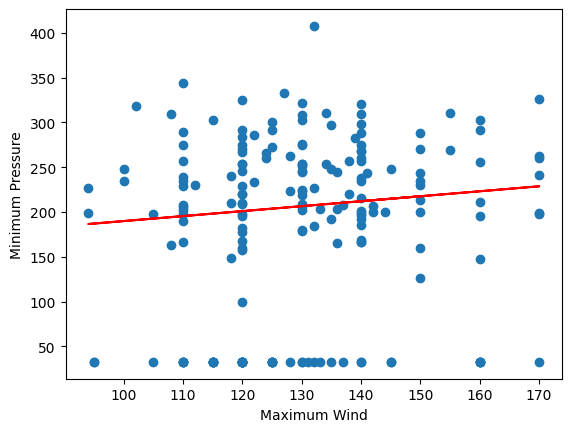

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data['RestingBP'].values.reshape(-1, 1)
y = data['Cholesterol'].values.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Predict the target values of the test set
y_pred = reg.predict(X_test)


# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R^2):', r2)


# Plot the true vs predicted values
plt.scatter(X_test, y_test)
plt.xlabel('Maximum Wind')
plt.ylabel('Minimum Pressure')

# Add a regression line to the plot
plt.plot(X_test, y_pred, color='red')

plt.show()

(b)logistic regression

In [ ]:
LR = LogisticRegression(C=2, penalty='l1', random_state=0, solver='liblinear')
LR.fit(x_train_new, y_train)

y_test_pred_LR = LR.predict(x_test_new)
y_train_pred_LR = LR.predict(x_train_new)

test_acc_LR = accuracy_score(y_test, y_test_pred_LR)
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)
scores_LR = cross_val_score(LR, x_train_new , y_train , cv = 10, scoring = 'accuracy' )

precision_score_LR = precision_score(y_test, y_test_pred_LR)
recall_score_LR = recall_score(y_test, y_test_pred_LR)
f1_score_LR = f1_score(y_test, y_test_pred_LR)
conf_LR = confusion_matrix(y_test, y_test_pred_LR)


print("Tain set Accuracy: ", train_acc_LR)
print("Test set Accuracy: ", test_acc_LR)
print("cv:  %s\n"% scores_LR.mean())
print("************************************************")
print("precision_score: ", precision_score_LR)
print("recall_score: ", recall_score_LR)
print("f1_score: ", f1_score_LR)
print("************************************************")
print("\nReport:\n%s\n"%classification_report(y_test, y_test_pred_LR))

Tain set Accuracy:  0.8504672897196262
Test set Accuracy:  0.8115942028985508
cv:  0.8505048076923079

************************************************
precision_score:  0.8435374149659864
recall_score:  0.8104575163398693
f1_score:  0.8266666666666667
************************************************

Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       123
           1       0.84      0.81      0.83       153

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276




<h3><u><B>CO-4. ASSIGNMENT

<b>9.</b>Implement k-means/k-medoid clustering algorithms and do prediction for unknown data.


In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00


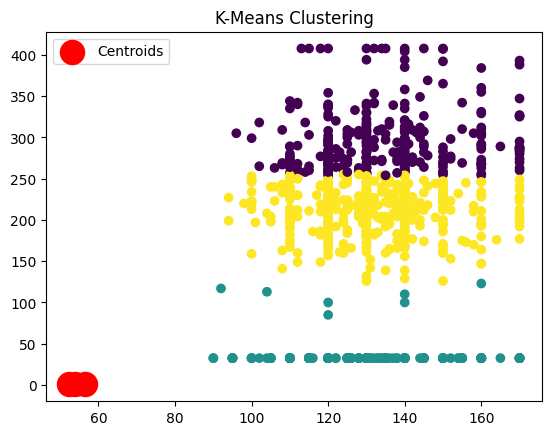

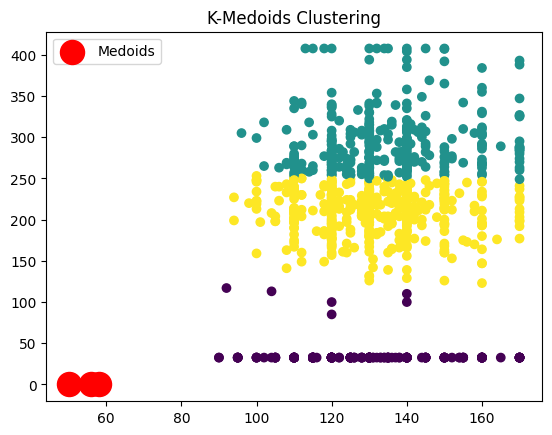

K-Means Prediction for Unknown Data: [2 0]
K-Medoids Prediction for Unknown Data: [2 1]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt


X = data

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(X)

# Predict clusters for the data points
kmeans_labels = kmeans.predict(X)
kmedoids_labels = kmedoids.predict(X)

# Visualize the clusters for K-Means
plt.scatter(X['RestingBP'], X['Cholesterol'], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Visualize the clusters for K-Medoids
plt.scatter(X['RestingBP'], X['Cholesterol'], c=kmedoids_labels, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], s=300, c='red', label='Medoids')
plt.title('K-Medoids Clustering')
plt.legend()
plt.show()

# Predict clusters for unknown data points
unknown_data = np.array([[140, 150, 130, 170,190,166,125,190,210,170,180,160], [289.00, 280.00, 290.00, 283.00,271.00,290.00,273.00,240.00,255.00,281.00,260.00,247.00]])  # Replace with your own data
kmeans_prediction = kmeans.predict(unknown_data)
kmedoids_prediction = kmedoids.predict(unknown_data)

print("K-Means Prediction for Unknown Data:", kmeans_prediction)
print("K-Medoids Prediction for Unknown Data:", kmedoids_prediction)

<b>10.</b>Implement hierarchical clustering algorithms and do prediction for unknown data.


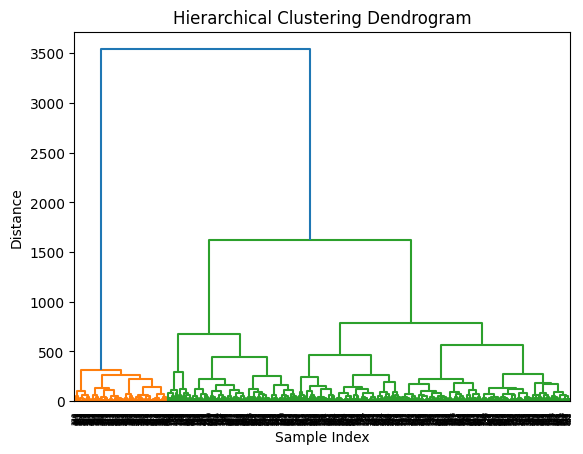

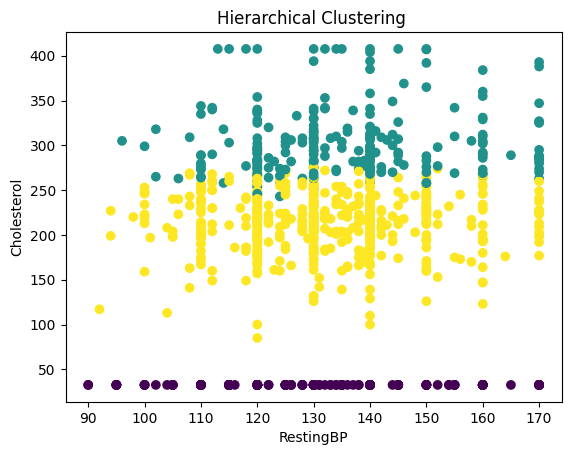

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


X = df

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward', metric='euclidean')

# Create a dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Determine the number of clusters using the dendrogram
num_clusters = 3  # Adjust this based on the dendrogram

# Perform clustering to assign data points to clusters
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Visualize the clusters for the Iris dataset
plt.scatter(X['RestingBP'], X['Cholesterol'], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering ')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.show()



In [ ]:
# Predict clusters for unknown data points
unknown_data = np.array([[140, 150, 130, 170], [289.00, 280.00, 290.00, 283.00]])  # Replace with your own data

# Rebuild the linkage matrix with the unknown data points
linkage_matrix_unknown = linkage(unknown_data, method='ward', metric='euclidean')

# Assign clusters to the unknown data points
unknown_clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

print("Clusters for Unknown Data:", unknown_clusters)

Clusters for Unknown Data: [2 3 2 3 3 2 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 2 2 2 3 2 3 3 3 3 3 2
 3 3 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3 3 3 3 3 2 2 3 3 3 2 3 2 2 3 3 2 3 3 3 3
 3 3 2 3 3 3 2 3 3 3 3 3 2 3 2 3 3 2 3 2 3 3 3 3 3 3 2 3 2 2 3 3 2 3 3 3 3
 3 2 2 3 3 2 2 3 3 3 3 3 2 3 2 3 3 3 3 2 3 2 3 2 3 3 3 3 3 2 2 2 3 2 2 3 3
 3 2 3 3 3 3 2 2 3 3 2 3 2 3 3 3 3 2 3 3 3 3 3 3 2 3 3 2 3 2 3 3 3 3 2 3 2
 3 2 3 2 2 2 3 3 3 3 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3 2 2 2 3 3 3 2 3 3 3 3 2
 3 2 3 3 3 3 2 3 2 2 2 3 2 3 2 2 2 3 2 3 2 2 2 3 3 2 3 2 2 2 2 2 3 2 2 3 3
 2 2 3 3 3 3 2 2 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 2 2 3 3 3 2 3 3 3 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 3 3 3 3 1 3 1 1 2 3 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 3
 3 3 1 3 3 1 1 1 2 1 3 1 1 1 1 1 2 1 3 1 1 3 1 1 3 3 1 1 1 2 1 1 3 1 2 1 

<b>11.</b>Implement DBSCAN clustering algorithms and do prediction for unknown data.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_1=data[['Sex','Cholesterol','FastingBS','RestingECG','ExerciseAngina','Oldpeak','ST_Slope']]
data_scaled = scaler.fit_transform(data_1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the data
clusters = dbscan.fit_predict(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Cholesterol,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope
0,1,289.00,0,1,0,0.00,2
1,0,180.00,0,1,0,1.00,1
2,1,283.00,0,2,0,0.00,2
3,0,214.00,0,1,1,1.50,1
4,1,195.00,0,1,0,0.00,2
...,...,...,...,...,...,...,...
913,1,264.00,0,1,0,1.20,1
914,1,193.00,1,1,0,3.40,1
915,1,131.00,0,1,1,1.20,1
916,0,236.00,0,0,0,0.00,1


In [ ]:
unknown_data = pd.DataFrame({
    'Sex':[1],'Cholesterol': [195.0],'FastingBS': [0],'RestingECG': [1],'ExerciseAngina': [0],'Oldpeak': [1],'ST_Slope': [2]
})

# Scale the unknown data using the same scaler
unknown_data_scaled = scaler.transform(unknown_data)

# Predict the cluster for the unknown data
unknown_cluster = dbscan.fit_predict(unknown_data_scaled)

print("Cluster for unknown data:", unknown_cluster)

Cluster for unknown data: [-1]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<b>12.</b>Implement apriori algorithm to get association rules.




In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Sample transaction data (replace with your own dataset)
data = pd.DataFrame({
    'TransactionID': [1, 2, 3, 4, 5],
    'Items': ['A, B, D', 'B, C', 'A, C, D', 'A, D', 'B, C']
})

# Split items in the 'Items' column and create binary columns
items_df = data['Items'].str.get_dummies(', ')

# Concatenate the binary columns with the original DataFrame
data = pd.concat([data, items_df], axis=1)

# Drop the original 'Items' column
data.drop('Items', axis=1, inplace=True)

# Apply Apriori algorithm
frequent_itemsets = apriori(data.drop('TransactionID', axis=1), min_support=0.5, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Display association rules
print("Association Rules:")
print(rules)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0         (A)         (D)                0.60                0.60     0.60   
1         (D)         (A)                0.60                0.60     0.60   

   confidence  lift  leverage  conviction  zhangs_metric  
0        1.00  1.67      0.24         inf           1.00  
1        1.00  1.67      0.24         inf           1.00  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<b>13.</b>Implement backpropagation neural network algorithm.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train_new.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.fit(x_train_new, y_train, epochs=50, batch_size=32, validation_data=(x_test_new, y_test))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/50
21/21 [==============================] - 3s 39ms/step - loss: 2.1728 - accuracy: 0.5125 - val_loss: 1.3300 - val_accuracy: 0.5000
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 0.8617 - accuracy: 0.5826 - val_loss: 0.6331 - val_accuracy: 0.5906
Epoch 3/50
21/21 [==============================] - 0s 13ms/step - loss: 0.7020 - accuracy: 0.5748 - val_loss: 0.6916 - val_accuracy: 0.5870
Epoch 4/50
21/21 [==============================] - 0s 9ms/step - loss: 0.6500 - accuracy: 0.6542 - val_loss: 0.6627 - val_accuracy: 0.6087
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 0.6442 - accuracy: 0.5950 - val_loss: 0.5810 - val_accuracy: 0.7101
Epoch 6/50
21/21 [==============================] - 0s 10ms/step - loss: 0.5939 - accuracy: 0.7056 - val_loss: 0.6274 - val_accuracy: 0.6630
Epoch 7/50
21/21 [==============================] - 0s 13ms/step - loss: 0.6134 - accuracy: 0.6464 - val_loss: 0.6116 - val_accuracy: 0.6812
Epoch 8/50
21/2

In [ ]:
loss, accuracy = model.evaluate(x_test_new, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


9/9 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8116
Accuracy: 81.16%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<b>14.</b>Make a comparison tables for classification and clustering algorithms, for what you implemented here:


(a)Write unknown data:


In [ ]:
unknown_data = pd.DataFrame({
    'Sex':[1],'Cholesterol': [195.0],'FastingBS': [0],'RestingECG': [1],'ExerciseAngina': [0],'Oldpeak': [1],'ST_Slope': [2]
})

(b)Compare performance of classification algorithms:


<table>
  <tr>
    <th>Algorithm name</th>
    <th>Accuracy</th>
    <th>Sensitivity</th>
    <th>F-measure</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>Predicted value for unknown data</th>
  </tr>
  <tr>
    <td>KNN</td>
    <td> 0.77</td>
    <td> 0.56 </td>
    <td>0.66</td>
    <td>0.82</td>
    <td>0.56 </td>
    <td>[1,264.00,0,1,0,1.20,1]</td>
  </tr>
  <tr>
    <td>Decision tree </td>
    <td>0.68</td>
    <td>0.56</td>
    <td>0.66</td>
    <td>0.82</td>
    <td>0.56</td>
    <td>[0,192.00,0,1,0,1,1]</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>0.60</td>
    <td>0.40</td>
    <td>0.53</td>
    <td>0.77 </td>
    <td>0.40</td>
    <td>[1,190.00,1,1,0,1.20,1]</td>
  </tr>
  <tr>
    <td>logistic regression</td>
    <td>0.81</td>
    <td>0.81</td>
    <td>0.83</td>
    <td>0.84</td>
    <td>0.81</td>
    <td>[1,224.00,0,1,0,1.20,1]</td>
    </tr>


(c) Compare performance of clustering algorithms you implemented.
Conclude which clustering algorithm is the best for your data.


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in X

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data[['Cholesterol','Oldpeak']])
kmeans_labels = kmeans.labels_
kmeans_silhouette_score = silhouette_score(data[['Cholesterol','Oldpeak']], kmeans_labels)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(data[['Cholesterol','Oldpeak']])
agg_labels = agg.labels_
agg_silhouette_score = silhouette_score(data[['Cholesterol','Oldpeak']], agg_labels)

# Printing the results
print("Comparison of Clustering Algorithms:")
print(f"K-means Silhouette Score: {kmeans_silhouette_score}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comparison of Clustering Algorithms:
K-means Silhouette Score: 0.6412359569219986
Agglomerative Clustering Silhouette Score: 0.6331864431898627


(d) Use different distance measures as in CO2’s 3rd assignment and make a table to compare the performance of clustering algorithms you implemented. Conclude which clustering algorithm is the best for your data.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.spatial.distance import cityblock, cosine, hamming

# Assuming you have already initialized X and the clustering algorithms
X=data[['Cholesterol','Oldpeak']]
# Calculate distances for K-means
kmeans_distances = {
    'Euclidean': cdist(X, kmeans.cluster_centers_, 'euclidean'),
    'Minkowski': cdist(X, kmeans.cluster_centers_, 'minkowski', p=3),
    'Manhattan': cdist(X, kmeans.cluster_centers_, 'cityblock'),
    'Jaccard': cdist(X, kmeans.cluster_centers_, 'jaccard'),
    'Cosine': cdist(X, kmeans.cluster_centers_, 'cosine'),
    'Simple matching coefficient': cdist(X, kmeans.cluster_centers_, 'hamming')
}

# Calculate distances for Agglomerative clustering
agg_distances = {
    'Euclidean': cdist(X, np.array([np.mean(X, axis=0)]), 'euclidean'),
    'Minkowski': cdist(X, np.array([np.mean(X, axis=0)]), 'minkowski', p=3),
    'Manhattan': cdist(X, np.array([np.mean(X, axis=0)]), 'cityblock'),
    'Jaccard': cdist(X, np.array([np.mean(X, axis=0)]), 'jaccard'),
    'Cosine': cdist(X, np.array([np.mean(X, axis=0)]), 'cosine'),
    'Simple matching coefficient': cdist(X, np.array([np.mean(X, axis=0)]), 'hamming')
}

# Create a table to compare the performance of clustering algorithms using different distance measures
print("Comparison Table for Clustering Algorithms with Different Distance Measures:")
print("{:<30} {:<15} {:<15}".format('Distance Measure', 'K-means', 'Agglomerative'))
for key in kmeans_distances:
    print("{:<30} {:<15} {:<15}".format(key, np.mean(kmeans_distances[key]), np.mean(agg_distances[key])))

kmeans_avg_distance = np.mean([np.mean(kmeans_distances[key]) for key in kmeans_distances])
agg_avg_distance = np.mean([np.mean(agg_distances[key]) for key in agg_distances])

if kmeans_avg_distance < agg_avg_distance:
    print("K-means clustering is better for this data based on average distance.")
elif kmeans_avg_distance > agg_avg_distance:
    print("Agglomerative clustering is better for this data based on average distance.")
else:
    print("Both clustering algorithms perform equally well on this data based on average distance.")

Comparison Table for Clustering Algorithms with Different Distance Measures:
Distance Measure               K-means         Agglomerative  
Euclidean                      114.69836183068112 73.93444631498534
Minkowski                      114.67886375312288 73.91572636510742
Manhattan                      115.53680360449827 74.77196816514065
Jaccard                        1.0             1.0            
Cosine                         0.0001881248529648123 0.00014330835913913814
Simple matching coefficient    1.0             1.0            
Agglomerative clustering is better for this data based on average distance.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<b>15.</b>Write any deep learning program of your choice.


In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest ,chi2 ,f_classif
from sklearn.preprocessing import StandardScaler , MinMaxScaler

from sklearn.linear_model import LogisticRegression , Lasso , RidgeClassifier
#from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(x_train_new.shape[1],)),
    keras.layers.Dense(256 , activation = "relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128 , activation = "relu"),
    keras.layers.Dropout(0.25),


    keras.layers.Dense(1 , activation = "sigmoid"),
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

earlystopping = EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense_3 (Dense)             (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35073 (137.00 KB)
Trainable params: 3507

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
history = model.fit(x_train_new, y_train, validation_data=(x_test_new, y_test), epochs=300, batch_size=64, callbacks=[earlystopping])

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11/11 [==============================] - 3s 63ms/step - loss: 6.4640 - accuracy: 0.5156 - val_loss: 2.9860 - val_accuracy: 0.4457
Epoch 2/300
11/11 [==============================] - 0s 20ms/step - loss: 4.7146 - accuracy: 0.4844 - val_loss: 2.8045 - val_accuracy: 0.5543
Epoch 3/300
11/11 [==============================] - 0s 44ms/step - loss: 3.5021 - accuracy: 0.5234 - val_loss: 0.7515 - val_accuracy: 0.5543
Epoch 4/300
11/11 [==============================] - 1s 61ms/step - loss: 3.0441 - accuracy: 0.5312 - val_loss: 1.7012 - val_accuracy: 0.4783
Epoch 5/300
11/11 [==============================] - 1s 62ms/step - loss: 2.9675 - accuracy: 0.4829 - val_loss: 1.0572 - val_accuracy: 0.5543
Epoch 6/300
11/11 [==============================] - 0s 42ms/step - loss: 2.5610 - accuracy: 0.5530 - val_loss: 1.6527 - val_accuracy: 0.4493
Epoch 7/300
11/11 [==============================] - 1s 51ms/step - loss: 2.0296 - accuracy: 0.5218 - val_loss: 0.8404 - val_accuracy: 0.5543
Epoch 8/300
11/11 

In [ ]:
model.evaluate(x_test_new  ,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5543


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.6868999600410461, 0.554347813129425]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


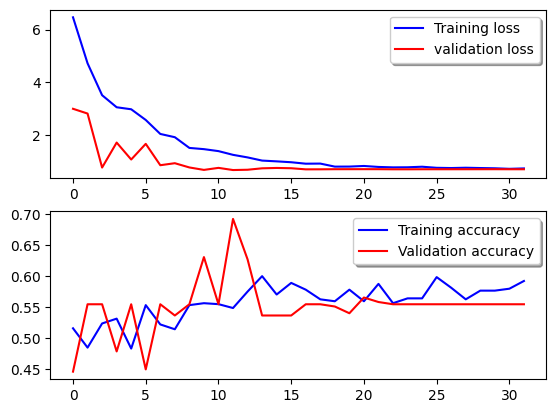

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
Y_pred = model.predict(x_test_new)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9/9 [==============================] - 0s 5ms/step


In [ ]:
y_pred_binary = (Y_pred > 0.5).astype(int)
y_pred_binary.reshape(276)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
ann_cm = confusion_matrix(y_test, y_pred_binary)
ann_acc = round(accuracy_score(y_pred_binary,y_test) * 100, 2)
print(ann_cm)
print(ann_acc,'%')

[[  0 123]
 [  0 153]]
55.43 %


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
